In [ ]:
!pip install --upgrade hvplot panel bokeh ipykernel holoviews ipywidgets

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import hvplot.pandas
import panel as pn
import holoviews as hv

pn.extension()

# urls = [
#     "https://tinyurl.com/ChrisCoDV/001336007/CinemaWeeklyVisitors.csv",
#     "https://tinyurl.com/ChrisCoDV/001336007/CinemaAge.csv",
#     "https://tinyurl.com/ChrisCoDV/001336007/CinemaCapacity.csv",
#     "https://tinyurl.com/ChrisCoDV/001336007/CinemaMarketing.csv",
#     "https://tinyurl.com/ChrisCoDV/001336007/CinemaOverheads.csv",
#     "https://tinyurl.com/ChrisCoDV/001336007/CinemaSpend.csv"
# ]
customer_df = pd.DataFrame()
data =  pd.read_csv('https://tinyurl.com/ChrisCoDV/001336007/CinemaWeeklyVisitors.csv', index_col = 0)
data.index = pd.to_datetime(data.index)
print(data.head())

age_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001336007/CinemaAge.csv', index_col = 0)
capacity_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001336007/CinemaCapacity.csv', index_col = 0)
marketing_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001336007/CinemaMarketing.csv', index_col = 0)
overheads_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001336007/CinemaOverheads.csv', index_col = 0)
spend_data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001336007/CinemaSpend.csv', index_col = 0)

summary_data = pd.DataFrame(index=data.columns)
summary_data['Age'] = age_data.values
summary_data['Capacity'] =capacity_data.values
summary_data['Marketing'] =marketing_data.values
summary_data['Visitors']= data.sum().values
summary_data['Overheads'] = overheads_data.values
summary_data['Spending'] = spend_data.values
#summary_data['Cost'] = summary_data['Price'] - summary_data['Overheads']
print(summary_data.head())
print(summary_data.describe())

normalised_data = summary_data / summary_data.max()
print(normalised_data.head())

            WKL  BKK  CCX  ZQL   VPG  JJQ  ACQ  AKA  WQW  UVQ  ...  SJE  BQV  \
Date                                                           ...             
2019-01-01  102    0    0  124  1301  134  167    0  206  359  ...  329    0   
2019-01-08  153    0    0  115   922  162  177    0  151  394  ...  291    0   
2019-01-15  116    0    0  123  1055  160  176    0  214  418  ...  325    0   
2019-01-22  135    0    0  139  1009  152  175    0  173  356  ...  334    0   
2019-01-29  120    0    0  115   829  166  172    0  213  421  ...  346    0   

            YCI  CWN  ZWY  WVA  TPY   VJV  XWO  YKT  
Date                                                 
2019-01-01  134    0  134  875  445   958  179  140  
2019-01-08  118    0  146  772  449  1073  169  158  
2019-01-15  118    0  147  922  443   959  159  164  
2019-01-22  134    0  146  962  441  1207  146  177  
2019-01-29  132    0  142  739  457   870  167  166  

[5 rows x 30 columns]
     Age  Capacity  Marketing  Visitor

## Pre-Processing

In [ ]:
Earnings = summary_data['Visitors'] * summary_data['Spending']
summary_data['Earnings'] = Earnings

In [ ]:
Overheads_overall = 4000*summary_data['Overheads']
Marketing_overall =  4000*summary_data['Marketing']
Cost = Overheads_overall+Marketing_overall
Profit = summary_data['Earnings'] - Cost
summary_data['Cost'] =Cost
summary_data['Profit']=Profit
summary_data['Marketing_overall'] = Marketing_overall
summary_data['Overheads_overall'] = Overheads_overall


In [ ]:
summary_data

,Age,Capacity,Marketing,Visitors,Overheads,Spending,Earnings,Cost,Profit,Marketing_overall,Overheads_overall
WKL,45,50,5,26731,18,16,427696,92000,335696,20000,72000
BKK,34,40,2,13208,37,16,211328,156000,55328,8000,148000
CCX,27,34,2,10741,40,17,182597,168000,14597,8000,160000
ZQL,29,41,2,12884,15,15,193260,68000,125260,8000,60000
VPG,35,548,16,198020,77,21,4158420,372000,3786420,64000,308000
JJQ,44,68,3,33018,37,22,726396,160000,566396,12000,148000
ACQ,41,112,5,35227,50,20,704540,220000,484540,20000,200000
AKA,45,30,2,9709,52,26,252434,216000,36434,8000,208000
WQW,28,80,6,39210,70,16,627360,304000,323360,24000,280000
UVQ,36,165,8,82108,72,21,1724268,320000,1404268,32000,288000


In [ ]:
data

,WKL,BKK,CCX,ZQL,VPG,JJQ,ACQ,AKA,WQW,UVQ,...,SJE,BQV,YCI,CWN,ZWY,WVA,TPY,VJV,XWO,YKT
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,102,0,0,124,1301,134,167,0,206,359,...,329,0,134,0,134,875,445,958,179,140
2019-01-08,153,0,0,115,922,162,177,0,151,394,...,291,0,118,0,146,772,449,1073,169,158
2019-01-15,116,0,0,123,1055,160,176,0,214,418,...,325,0,118,0,147,922,443,959,159,164
2019-01-22,135,0,0,139,1009,152,175,0,173,356,...,334,0,134,0,146,962,441,1207,146,177
2019-01-29,120,0,0,115,829,166,172,0,213,421,...,346,0,132,0,142,739,457,870,167,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-29,102,217,118,0,961,156,174,183,217,479,...,308,163,123,206,148,789,485,1250,176,146
2022-12-06,120,192,266,0,1049,172,164,150,184,409,...,356,138,125,193,132,924,489,704,166,176
2022-12-13,141,332,120,0,808,165,175,158,199,416,...,366,77,126,215,138,868,498,1212,174,130


In [ ]:
dates_with_zero_visitors = data.index[data.eq(0).any(axis=1)]

columns_with_zero_visitors = {}

for date in dates_with_zero_visitors:
    date_data = data.loc[date]
    columns_with_zero = date_data[date_data == 0].index.tolist()
    columns_with_zero_visitors[date] = columns_with_zero

for date, columns in columns_with_zero_visitors.items():
    print(f"On {date}, cinemas with zero visitors are: {columns}")

On 2019-01-01 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-01-08 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-01-15 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-01-22 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-01-29 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-02-05 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-02-12 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-02-19 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-02-26 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-03-05 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-03

In [ ]:
data.index = pd.to_datetime(data.index)

data_quarterly = data.groupby(pd.Grouper(freq='Q')).sum()

dates_with_zero_visitors = data_quarterly.index[data_quarterly.eq(0).any(axis=1)]

columns_with_zero_visitors = {}

for date in dates_with_zero_visitors:
    date_data = data_quarterly.loc[date]
    columns_with_zero = date_data[date_data == 0].index.tolist()
    columns_with_zero_visitors[date] = columns_with_zero

for date, columns in columns_with_zero_visitors.items():
    print(f"On {date}, cinemas with zero visitors are: {columns}")

On 2019-03-31 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-06-30 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-09-30 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2019-12-31 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'AKA', 'SDT', 'BQV', 'CWN']
On 2020-03-31 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'SDT', 'CWN']
On 2020-06-30 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'SDT', 'CWN']
On 2020-09-30 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'SDT', 'CWN']
On 2020-12-31 00:00:00, cinemas with zero visitors are: ['BKK', 'CCX', 'SDT', 'CWN']
On 2021-03-31 00:00:00, cinemas with zero visitors are: ['ZQL', 'BWF', 'SDT', 'CWN']
On 2021-06-30 00:00:00, cinemas with zero visitors are: ['ZQL', 'BWF', 'SDT', 'CWN']
On 2021-09-30 00:00:00, cinemas with zero visitors are: ['ZQL', 'BWF', 'SDT', 'CWN']
On 2021-1

# Segmentation Based on Visit Volume

In [ ]:
max_visitor = data.max()
print(max_visitor)


WKL     177
BKK     395
CCX     266
ZQL     149
VPG    1421
JJQ     200
ACQ     182
AKA     209
WQW     256
UVQ     481
TVJ     338
BWF     230
SDT     242
UDD     493
TJN     612
RPQ     393
XQE     196
WBK     521
YBS    1162
XEZ     223
SJE     379
BQV     326
YCI     141
CWN     221
ZWY     154
WVA    1206
TPY     501
VJV    1305
XWO     185
YKT     197
dtype: int64


In [ ]:
max_visitor.sort_values(axis=0, ascending=False, inplace=True)
print(max_visitor)


VPG    1421
VJV    1305
WVA    1206
YBS    1162
TJN     612
WBK     521
TPY     501
UDD     493
UVQ     481
BKK     395
RPQ     393
SJE     379
TVJ     338
BQV     326
CCX     266
WQW     256
SDT     242
BWF     230
XEZ     223
CWN     221
AKA     209
JJQ     200
YKT     197
XQE     196
XWO     185
ACQ     182
WKL     177
ZWY     154
ZQL     149
YCI     141
dtype: int64


In [ ]:
high_threshold = 1000
medium_threshold = 300
high_volume = max_visitor[max_visitor >= high_threshold]
medium_volume = max_visitor[(max_visitor < high_threshold) & (max_visitor >= medium_threshold)]
low_volume = max_visitor[max_visitor < medium_threshold]

print("High Volume:")
print(high_volume)
print("\nMedium Volume:")
print(medium_volume)
print("\nLow Volume:")
print(low_volume)

High Volume:
VPG    1421
VJV    1305
WVA    1206
YBS    1162
dtype: int64

Medium Volume:
TJN    612
WBK    521
TPY    501
UDD    493
UVQ    481
BKK    395
RPQ    393
SJE    379
TVJ    338
BQV    326
dtype: int64

Low Volume:
CCX    266
WQW    256
SDT    242
BWF    230
XEZ    223
CWN    221
AKA    209
JJQ    200
YKT    197
XQE    196
XWO    185
ACQ    182
WKL    177
ZWY    154
ZQL    149
YCI    141
dtype: int64


In [ ]:
high_volume_data = {'Cinema': high_volume.index, 'Visitors': high_volume.values}
medium_volume_data = {'Cinema': medium_volume.index, 'Visitors': medium_volume.values}
low_volume_data = {'Cinema': low_volume.index, 'Visitors': low_volume.values}

high_volume_df = pd.DataFrame(high_volume_data)
medium_volume_df = pd.DataFrame(medium_volume_data)
low_volume_df = pd.DataFrame(low_volume_data)

print("High Volume:")
print(high_volume_df)
print("\nMedium Volume:")
print(medium_volume_df)
print("\nLow Volume:")
print(low_volume_df)

High Volume:
  Cinema  Visitors
0    VPG      1421
1    VJV      1305
2    WVA      1206
3    YBS      1162

Medium Volume:
  Cinema  Visitors
0    TJN       612
1    WBK       521
2    TPY       501
3    UDD       493
4    UVQ       481
5    BKK       395
6    RPQ       393
7    SJE       379
8    TVJ       338
9    BQV       326

Low Volume:
   Cinema  Visitors
0     CCX       266
1     WQW       256
2     SDT       242
3     BWF       230
4     XEZ       223
5     CWN       221
6     AKA       209
7     JJQ       200
8     YKT       197
9     XQE       196
10    XWO       185
11    ACQ       182
12    WKL       177
13    ZWY       154
14    ZQL       149
15    YCI       141


In [ ]:
high_volume_df['Volumes'] = 'High'
medium_volume_df['Volumes'] = 'Medium'
low_volume_df['Volumes'] = 'Low'

combined_df = pd.concat([high_volume_df, medium_volume_df, low_volume_df])

print("Combined DataFrame:")
print(combined_df)

Combined DataFrame:
   Cinema  Visitors Volumes
0     VPG      1421    High
1     VJV      1305    High
2     WVA      1206    High
3     YBS      1162    High
0     TJN       612  Medium
1     WBK       521  Medium
2     TPY       501  Medium
3     UDD       493  Medium
4     UVQ       481  Medium
5     BKK       395  Medium
6     RPQ       393  Medium
7     SJE       379  Medium
8     TVJ       338  Medium
9     BQV       326  Medium
0     CCX       266     Low
1     WQW       256     Low
2     SDT       242     Low
3     BWF       230     Low
4     XEZ       223     Low
5     CWN       221     Low
6     AKA       209     Low
7     JJQ       200     Low
8     YKT       197     Low
9     XQE       196     Low
10    XWO       185     Low
11    ACQ       182     Low
12    WKL       177     Low
13    ZWY       154     Low
14    ZQL       149     Low
15    YCI       141     Low


# Graphs on Visitor Data

**Heatmap for Visitor Data**


*   This graph shows the correlation between each cinema
*   High correlation values indicate strong positive( linear) correlation and correlation close to "-1" suggesting no positive correlation between cinemas



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
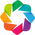

:HeatMap   [columns,index]   (value)

In [ ]:

plot = data.corr().hvplot.heatmap(
    frame_height=500, frame_width=500,
    title='Product correlations',
    rot=90, cmap='PiYG'  # see http://holoviews.org/user_guide/Colormaps.html
).opts(invert_yaxis=True, clim=(-1, 1))
hv.extension('bokeh')
plot

**Line Chart for Visitor Data**


*   Line chart shows the trend of visitors for each cinema
*   By using an interactive graph seperation of different volmued cinemas were enabled, leaving us with more clear and easy to read graphs



In [ ]:
def get_line_plot(volume):
    if volume == 'high':
        selected = ['VPG', 'VJV', 'WVA','YBS']
    elif volume == 'medium':
        selected = ['TJN', 'WBK', 'TPY', 'UDD', 'UVQ', 'BKK', 'RPQ', 'SJE', 'TVJ', 'BQV']
    else:
        selected = ['CCX', 'WQW', 'SDT', 'BWF', 'XEZ', 'CWN', 'AKA', 'JJQ', 'YKT', 'XQE', 'XWO', 'ACQ', 'WKL', 'ZWY', 'ZQL', 'YCI']
    df = data[selected] # restrict to selected products
    return df.hvplot.line(frame_width=600, grid=True)

In [ ]:
time_title = '## Cinema Visitors'
volumes = ['high', 'medium', 'low']

volume = pn.widgets.Select(name='Volume', options=volumes, width=200)

time_row = pn.Row(
    pn.Column(time_title, volume),
    get_line_plot(volume.value)
)

def update_time_row(event):
    time_row[1].object = get_line_plot(volume.value)

volume.param.watch(update_time_row, 'value')

time_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Volume', options=['high', 'medium', 'low'], value='high', width=200)
    [1] HoloViews(NdOverlay, height=300, sizing_mode='fixed')

**Pie Chart for cinemas**


*   Pie chart was utilized for seeing data  in a simple and easy-to-understand format




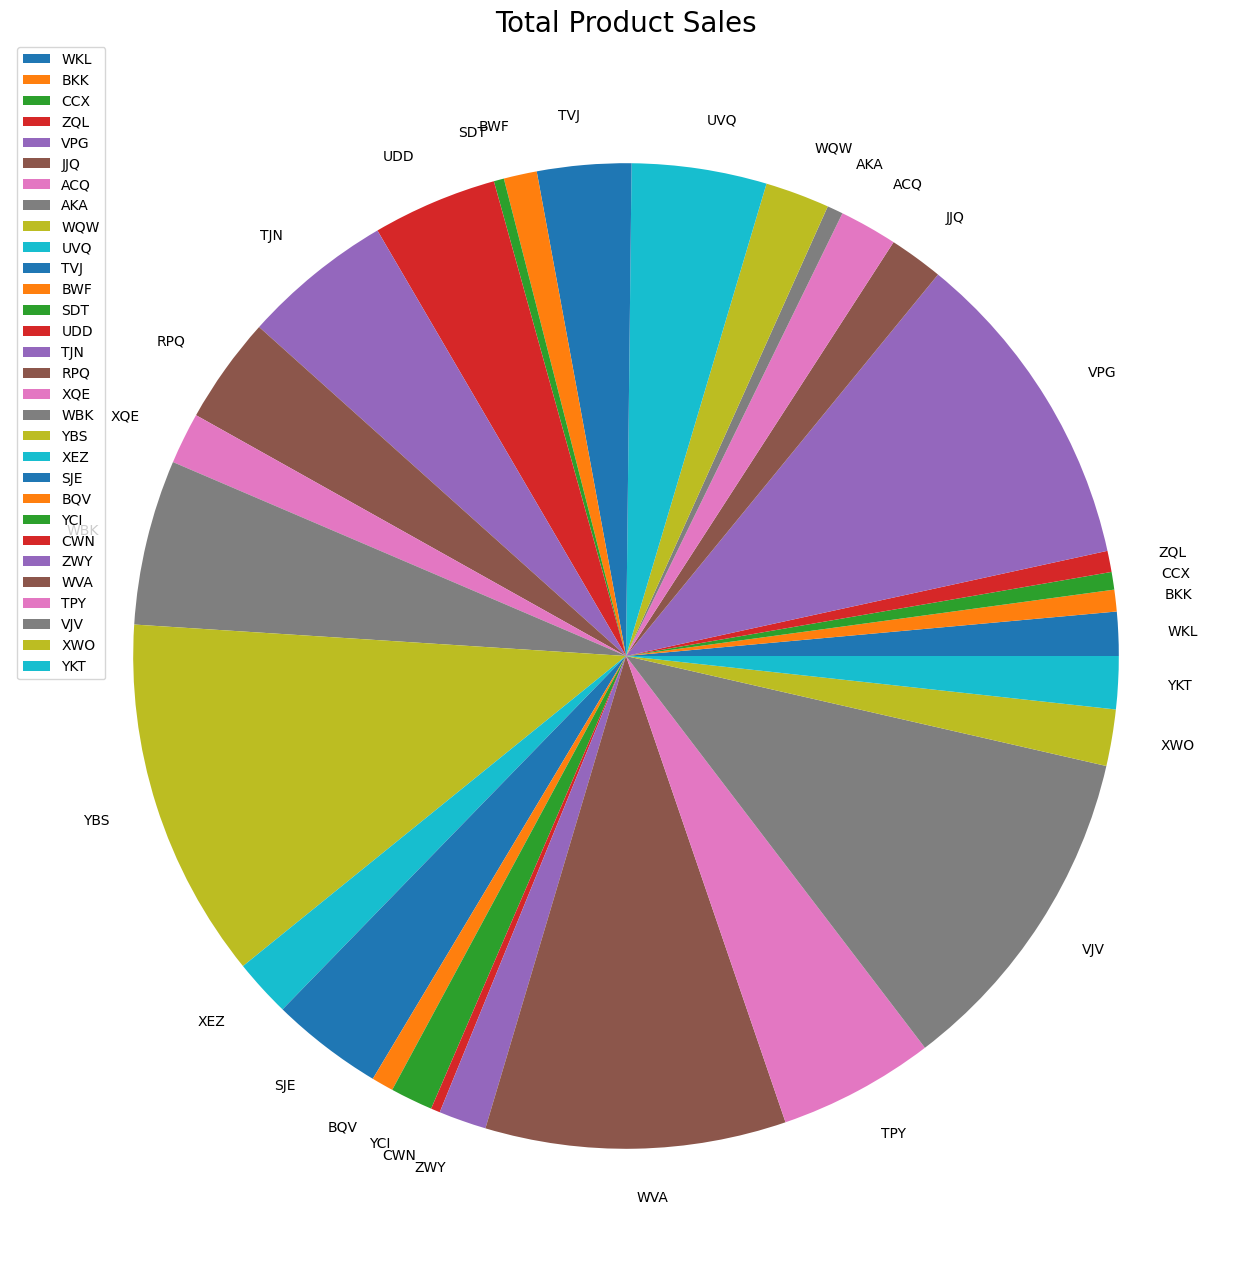

In [ ]:
plt.figure(figsize=(16, 16))
plt.pie(data.sum(), labels=data.columns)
plt.title('Total Product Sales', fontsize=20)
plt.legend(loc=2)
plt.show()

**Bar Charts of cinemas with different volume category**


*   An easy visualization to see the distribution of visit volumes, allowing us to evaluate the relative performance and appeal of different cinemas within each volume category



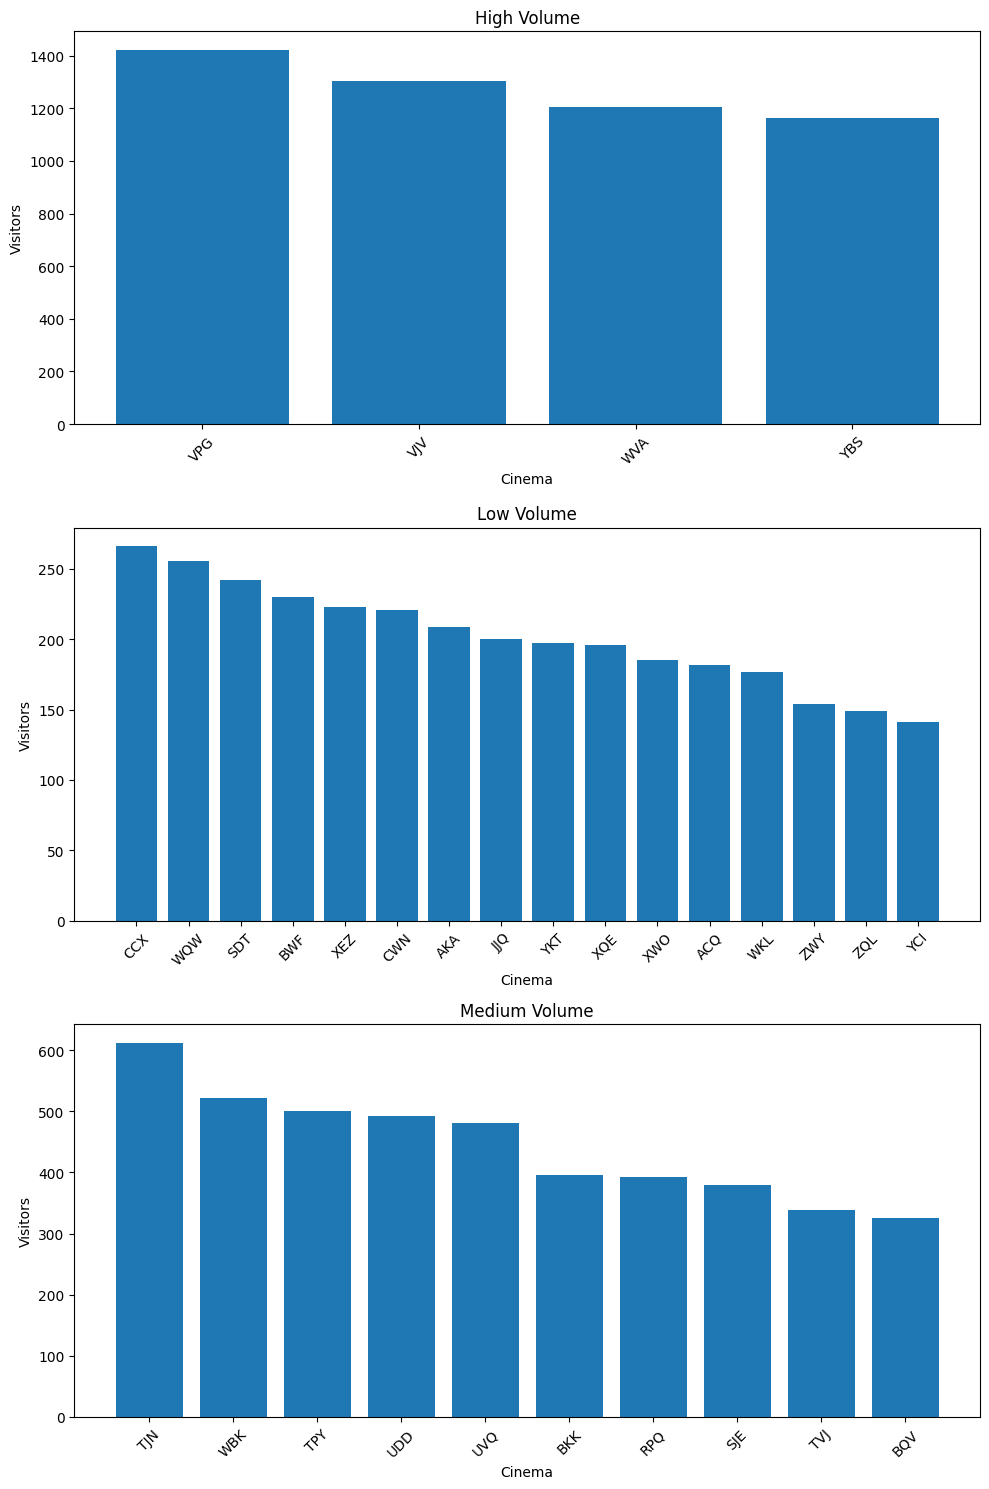

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (Volumes, group) in enumerate(combined_df.groupby('Volumes')):
    sub = axes[i]
    sub.bar(group['Cinema'], group['Visitors'])
    sub.set_title(Volumes + ' Volume')
    sub.set_xlabel('Cinema')
    sub.set_ylabel('Visitors')
    sub.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Bar Charts of cinemas with different volume category (subplots)**


/tmp/ipykernel_2114/669928323.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sub = plt.subplot(3,3,counter)


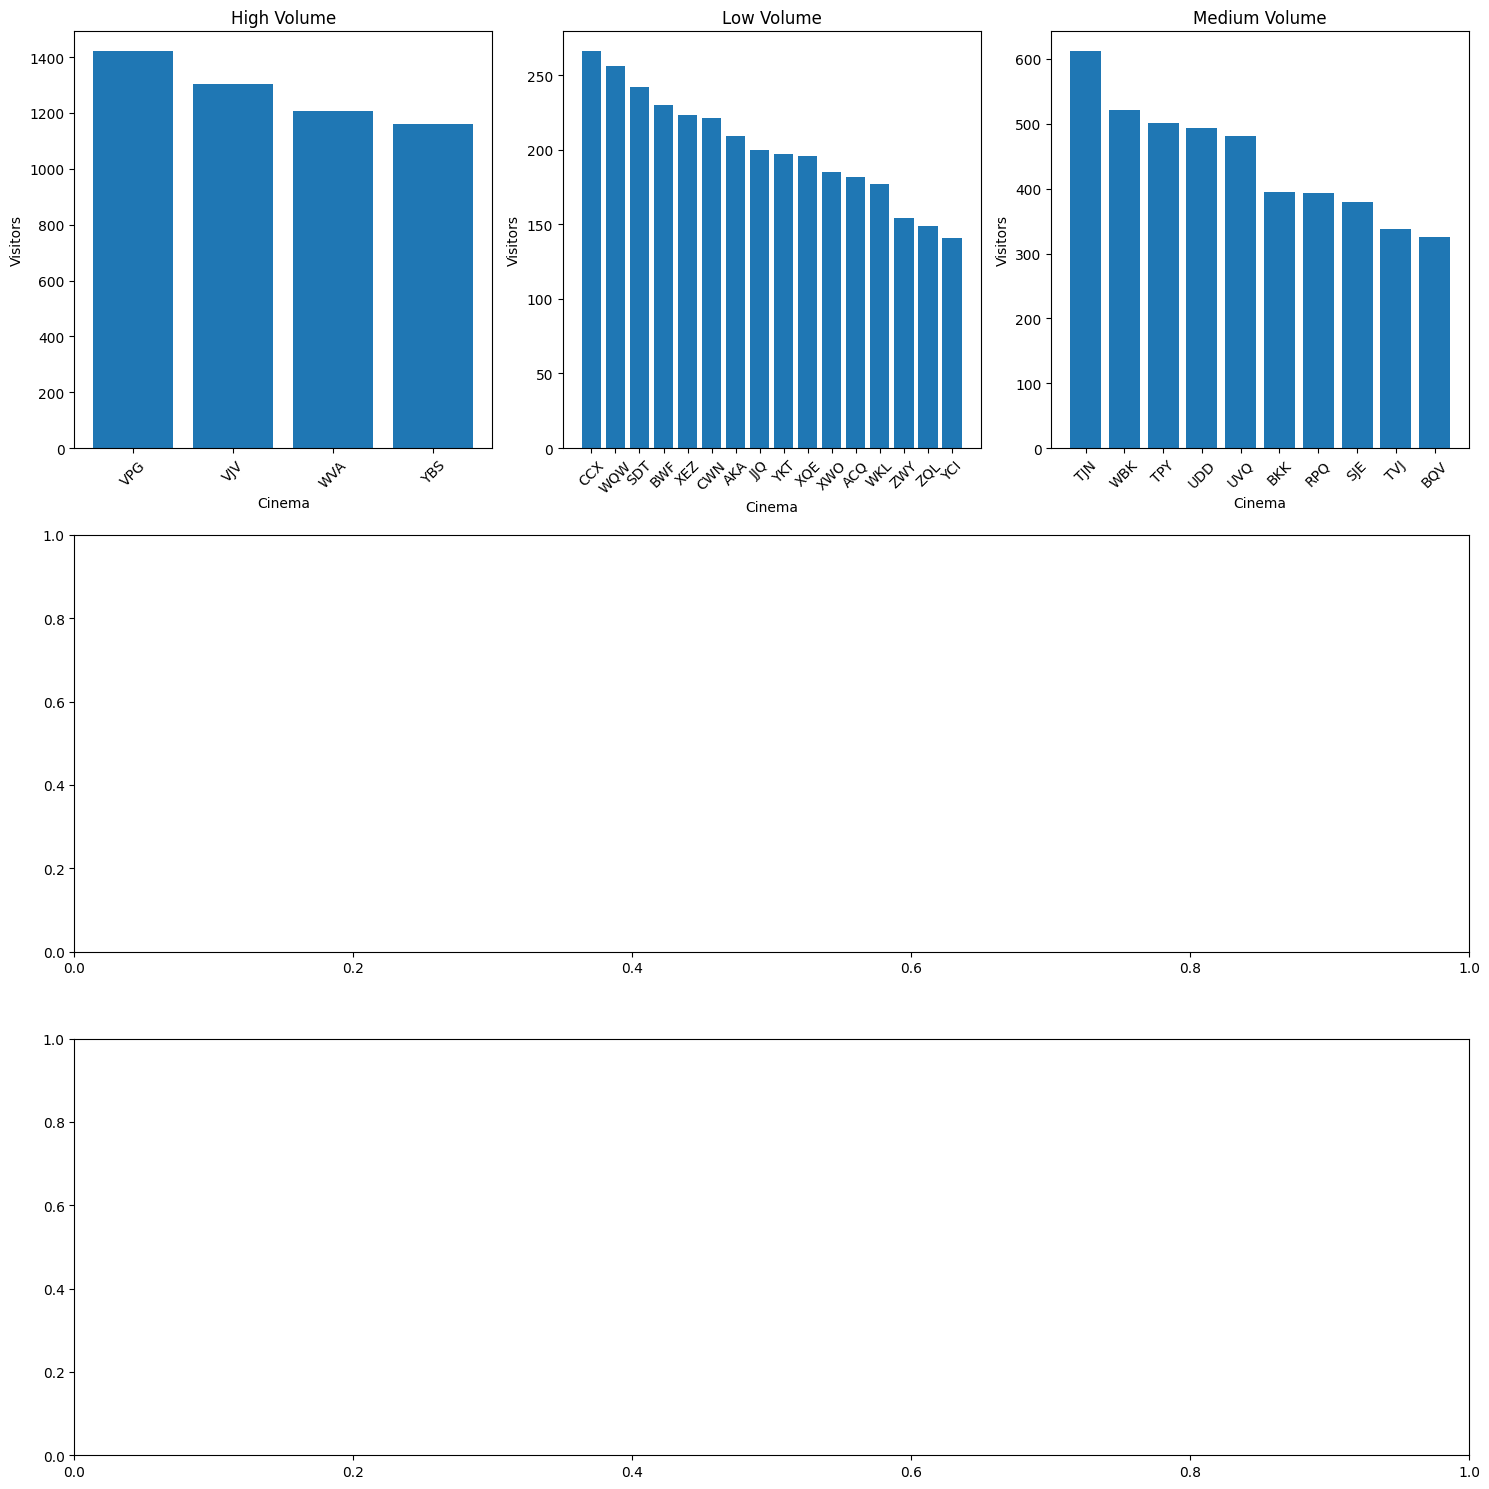

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
counter = 1

for i, (Volumes, group) in enumerate(combined_df.groupby('Volumes')):
    sub = axes[i]
    sub = plt.subplot(3,3,counter)
    sub.bar(group['Cinema'], group['Visitors'])
    sub.set_title(Volumes + ' Volume')
    sub.set_xlabel('Cinema')
    sub.set_ylabel('Visitors')
    sub.tick_params(axis='x', rotation=45)
    counter +=1

plt.tight_layout()
plt.show()

**Histogram for comparing medium volume cinemas**

*   Employing a histogram helps us to understand the distribution of visit volumes among cinemas, allowing us to compare their volumes for deeper understanding.




<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
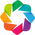

:NdOverlay   [Element]
   :Histogram   [BQV]   (BQV_count)

In [ ]:
selected_m = ['TJN', 'WBK', 'TPY', 'UDD', 'UVQ', 'BKK', 'RPQ', 'SJE', 'TVJ', 'BQV']

plot = data[selected_m].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Volume Category', ylabel='Number of Cinemas',
    title='Medium Volume Cinemas',
    alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset']
)
hv.extension('bokeh')
plot


**Histogram for comparing low volume cinemas**

*   Employing a histogram helps us to understand the distribution of visit volumes among cinemas, allowing us to compare their volumes for deeper understanding.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
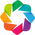

:NdOverlay   [Element]
   :Histogram   [YCI]   (YCI_count)

In [ ]:
selected_l = ['CCX', 'WQW', 'SDT', 'BWF', 'XEZ', 'CWN', 'AKA', 'JJQ', 'YKT', 'XQE', 'XWO', 'ACQ', 'WKL', 'ZWY', 'ZQL', 'YCI']

plot = data[selected_l].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Volume Category', ylabel='Number of Cinemas',
    title='Low Volume Cinemas',
    alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset']
)
hv.extension('bokeh')
plot


**Histogram for comparing High volume cinemas**

*   Employing a histogram helps us to understand the distribution of visit volumes among cinemas, allowing us to compare their volumes for deeper understanding.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
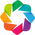

:NdOverlay   [Element]
   :Histogram   [YBS]   (YBS_count)

In [ ]:
selected_h = ['VPG', 'VJV', 'WVA','YBS']

plot = data[selected_h].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Volume Category', ylabel='Number of Cinemas',
    title='High Volume Cinemas',
    alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset']
)
hv.extension('bokeh')
plot




**Histogram for comparing cinemas**

*   Employing a histogram helps us to understand the distribution of visit volumes among cinemas, allowing us to compare their volumes for deeper understanding.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
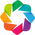

:NdOverlay   [Element]
   :Histogram   [YCI]   (YCI_count)

In [ ]:
selected_all = ['VPG', 'VJV', 'WVA','YBS','TJN', 'WBK', 'TPY', 'UDD', 'UVQ', 'BKK', 'RPQ', 'SJE', 'TVJ', 'BQV','CCX', 'WQW', 'SDT', 'BWF', 'XEZ', 'CWN', 'AKA', 'JJQ', 'YKT', 'XQE', 'XWO', 'ACQ', 'WKL', 'ZWY', 'ZQL', 'YCI']

plot = data[selected_all].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Volume Category', ylabel='Number of Cinemas',
    title='Cinema Segmentation Based on Total Volume of Visits',
    alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset']
)
hv.extension('bokeh')
plot


**Scatter plot and Correlation matrix of cinemas**


*    The correlation matrix is utilized to understand the relationship between different volumed cinemas and help us identify clusters with similar visitor volumes.

*   The scatter plot is utilized for a clear representation of correlations between cinemas, allowing quick identification of strong correlations in cinema visitor volumes.



In [ ]:
def get_correlation_plots(product_x, product_y):
    df = data
    return df.hvplot.scatter(frame_height=300, frame_width=300,
                             x=product_x, y=product_y,
                             title=product_x + ' vs ' + product_y,
                             size=10, padding=0.1) +\
           df.corr().hvplot.heatmap(frame_height=300, frame_width=300,
                                    title='Product correlations',
                                    rot=90, cmap='coolwarm'
                                   ).opts(invert_yaxis=True, clim=(-1, 1))

In [ ]:
correlation_title = '## Correlations'

product_x = pn.widgets.Select(name='x-axis', options=list(data.columns), width=200)
product_y = pn.widgets.Select(name='y-axis', options=list(data.columns), width=200)

correlation_row = pn.Row(
    pn.Column(correlation_title, product_x, product_y),
    get_correlation_plots(product_x.value, product_y.value)
)

def update_correlation_row(event):
    correlation_row[1].object = get_correlation_plots(product_x.value, product_y.value)

product_x.param.watch(update_correlation_row, 'value')
product_y.param.watch(update_correlation_row, 'value')

correlation_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='x-axis', options=['WKL', 'BKK', ...], value='WKL', width=200)
        [2] Select(name='y-axis', options=['WKL', 'BKK', ...], value='WKL', width=200)
    [1] HoloViews(Layout)

# Graphs on Summary Data

**Moving average and bar chart for cinemas**




*   The moving average line plot is utilized for understnading the overall trend and specific values of visitors across cinemas .






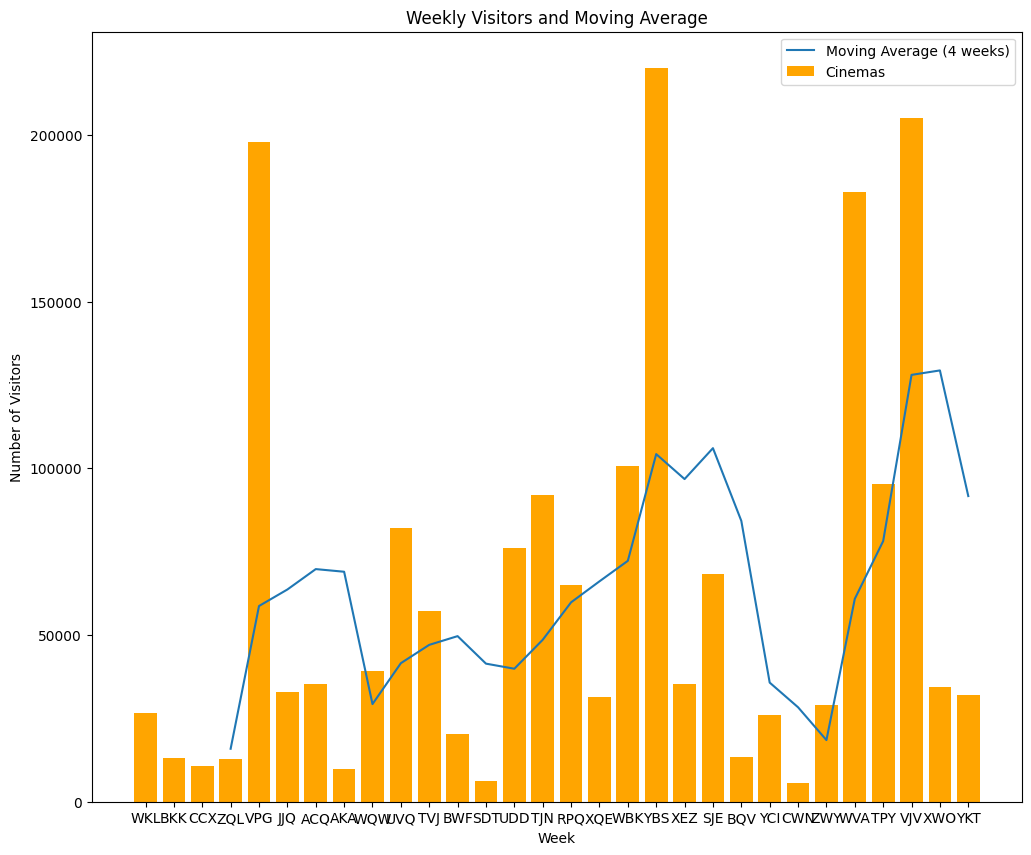

In [ ]:
import matplotlib.pyplot as plt

moving_avg = summary_data['Visitors'].rolling(window=4).mean()
plt.figure(figsize=(12, 10))

#plt.plot(summary_data.index, summary_data['Visitors'], 'o', label='Cinemas')
plt.bar(summary_data.index, summary_data['Visitors'], label='Cinemas', color='orange')
#plt.plot(summary_data.index, summary_data['Visitors'], label='Cinemas')
plt.plot(summary_data.index, moving_avg, label='Moving Average (4 weeks)')
plt.xlabel('Week')
plt.ylabel('Number of Visitors')
plt.title('Weekly Visitors and Moving Average')
plt.legend()
plt.show()

**Bar charts for each class in the summary data**



*   Bar chart is utilzied for simple visualization of the summary data.




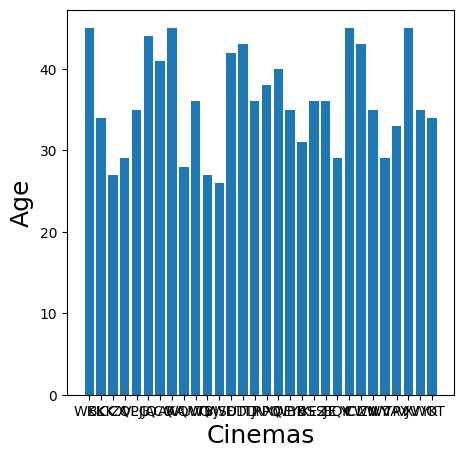

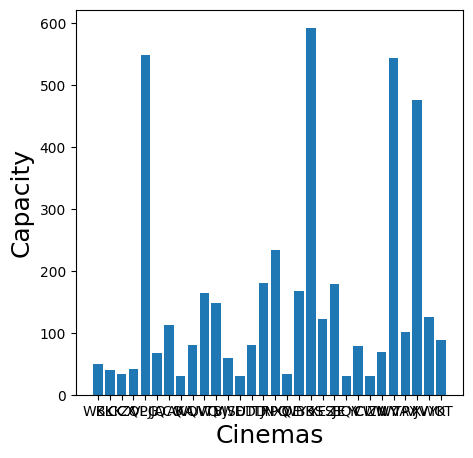

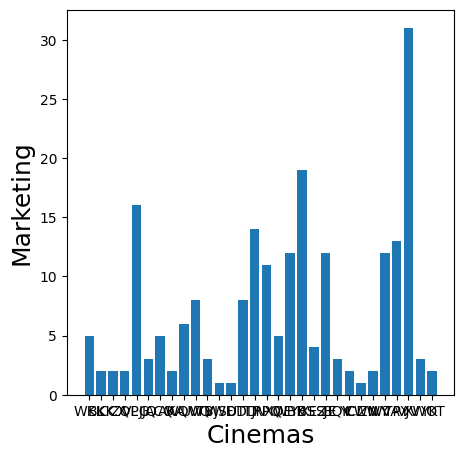

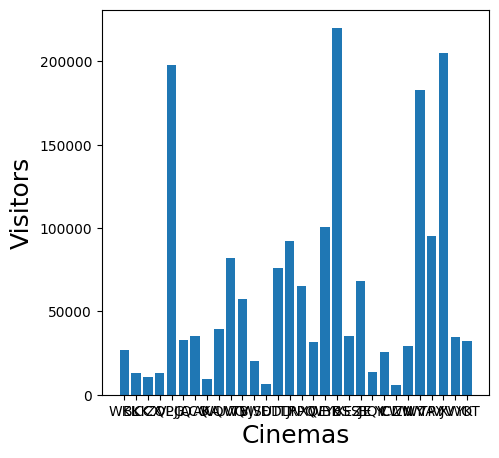

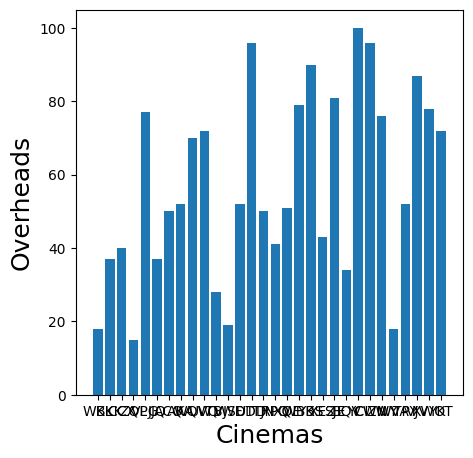

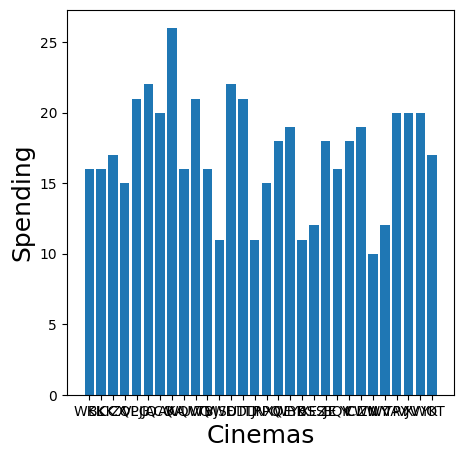

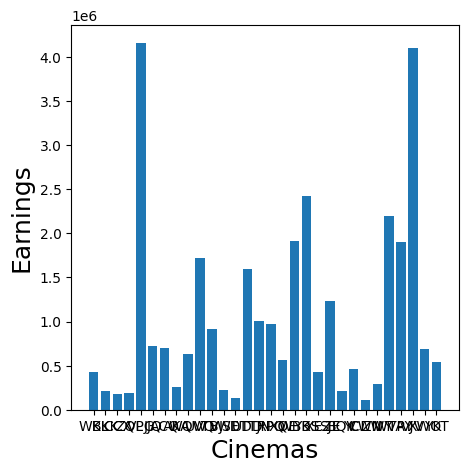

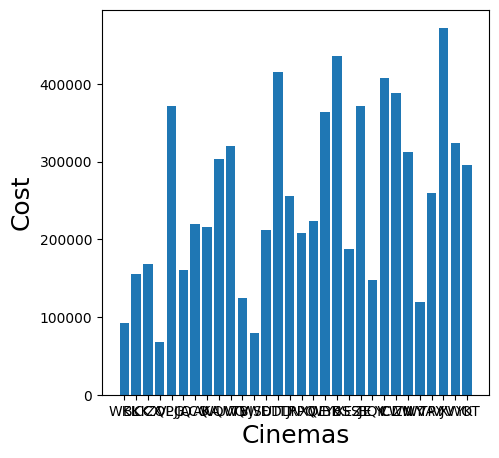

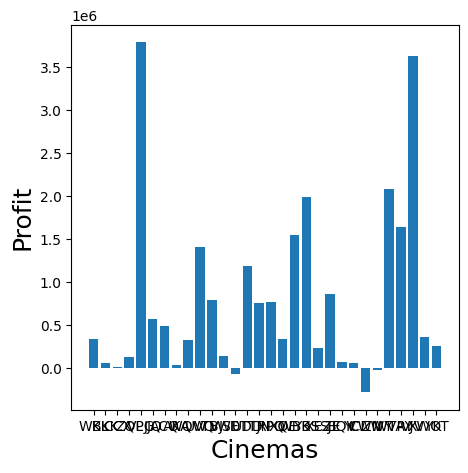

In [ ]:
for attribute in summary_data:
    plt.figure(figsize=(5, 5))
    x_pos = np.arange(len(summary_data.index))
    plt.bar(x_pos, summary_data[attribute], align='center')
    plt.xticks(x_pos, summary_data.index)
    plt.xlabel('Cinemas', fontsize=18)
    plt.ylabel(attribute, fontsize=18)
    plt.show()

**Scatter plot for comparing overall earning with marketing expenses**


*   Utilizing a scatter plot provides a better understanding and facilitates the comparison of each cinema performance against marketing expenses




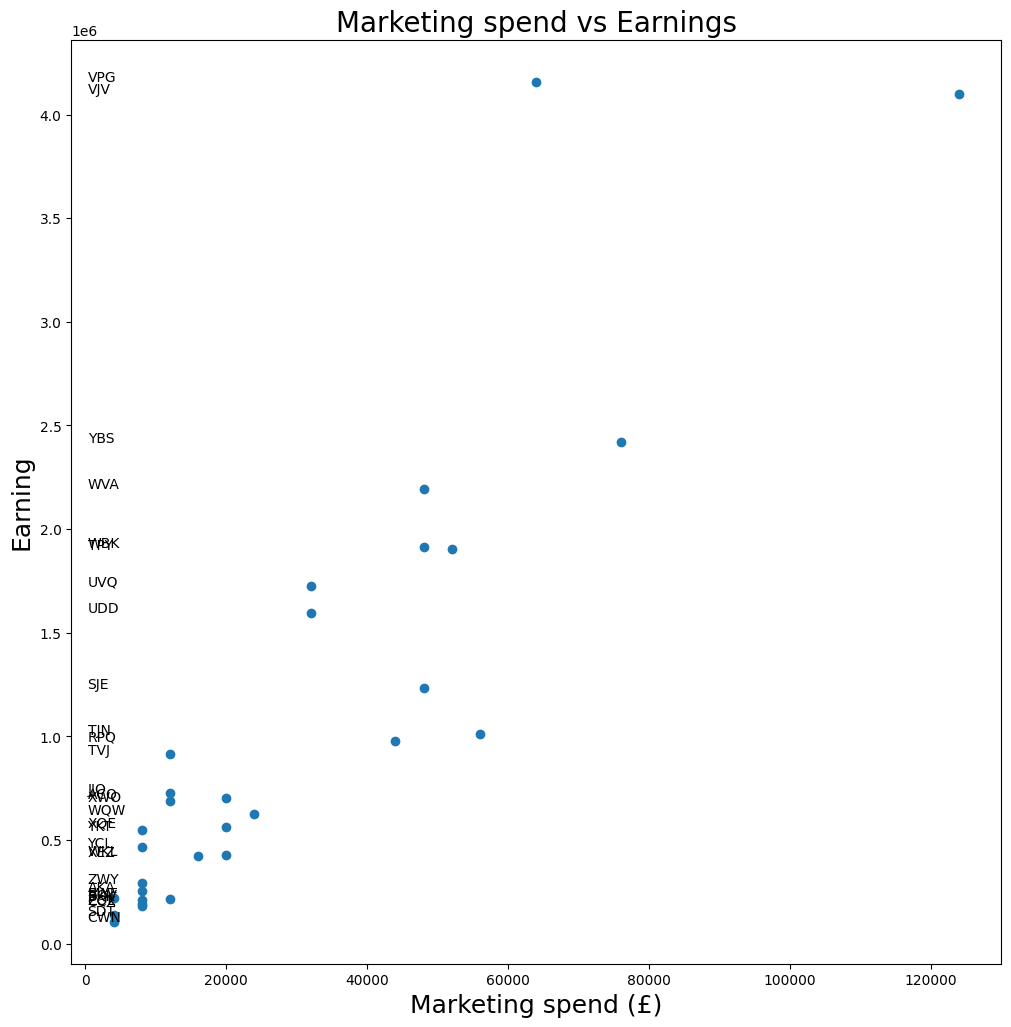

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(summary_data['Marketing']*4000, summary_data['Earnings'])
plt.title('Marketing spend vs Earnings', fontsize=20)
plt.xlabel('Marketing spend (£)', fontsize=18)
plt.ylabel('Earning', fontsize=18)
for i, name in enumerate(data.columns):
    plt.annotate(name, (summary_data['Marketing'][i] + 300, summary_data['Earnings'][i]))
plt.show()

**Statter Plot Correlation Matrix between summary data**


*    The correlation matrix is utilized to understand the relationship between different selected classes and help us identify clusters with similar patterns.

*   The scatter plot is utilized for understand the relationship between different classes of summary data about the cinemas and helps us to understand the correlations between different classes.




In [ ]:
def get_correlation_plots(product_x, product_y):
    df = summary_data
    return df.hvplot.scatter(frame_height=300, frame_width=300,
                             x=product_x, y=product_y,
                             title=product_x + ' vs ' + product_y,
                             size=10, padding=0.1, color='mediumorchid') +\
           df.corr().hvplot.heatmap(frame_height=300, frame_width=300,
                                    title='Product correlations',
                                    rot=90, cmap='coolwarm'
                                   ).opts(invert_yaxis=True, clim=(-1, 1))

In [ ]:
          #  df.hvplot.boxplot(frame_height=300, frame_width=300,
          #                    x1=product_x1, y1=product_y1,
          #                    title=product_x1 + ' vs ' + product_y1,
          #                    size=10, padding=0.1, color='magenta') +\

In [ ]:
summary_data

In [ ]:
correlation_title = '## Correlations'

product_x = pn.widgets.Select(name='x-axis', options=list(summary_data.columns), width=200)
product_y = pn.widgets.Select(name='y-axis', options=list(summary_data.columns), width=200)
# product_x1 = pn.widgets.Select(name='x1-axis', options=list(summary_data.columns), width=200)
# product_y1 = pn.widgets.Select(name='y1-axis', options=list(summary_data.columns), width=200)

correlation_row = pn.Row(
    pn.Column(correlation_title, product_x, product_y),
    get_correlation_plots(product_x.value, product_y.value)
)


def update_correlation_row(event):
    correlation_row[1].object = get_correlation_plots(product_x.value, product_y.value)

product_x.param.watch(update_correlation_row, 'value')
product_y.param.watch(update_correlation_row, 'value')
# product_x1.param.watch(update_correlation_row, 'value')
# product_y1.param.watch(update_correlation_row, 'value')

correlation_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='x-axis', options=['Age', 'Capacity', ...], value='Age', width=200)
        [2] Select(name='y-axis', options=['Age', 'Capacity', ...], value='Age', width=200)
    [1] HoloViews(Layout)

In [ ]:
sns.pairplot(summary_data, height=1.5, plot_kws={'s': 20})
plt.show()

In [ ]:
summary_data

**Scatter plot for comparing overall earning with marketing expenses**


*   Utilizing a scatter plot provides a better understanding and facilitates the comparison of each cinema performance against marketing expenses

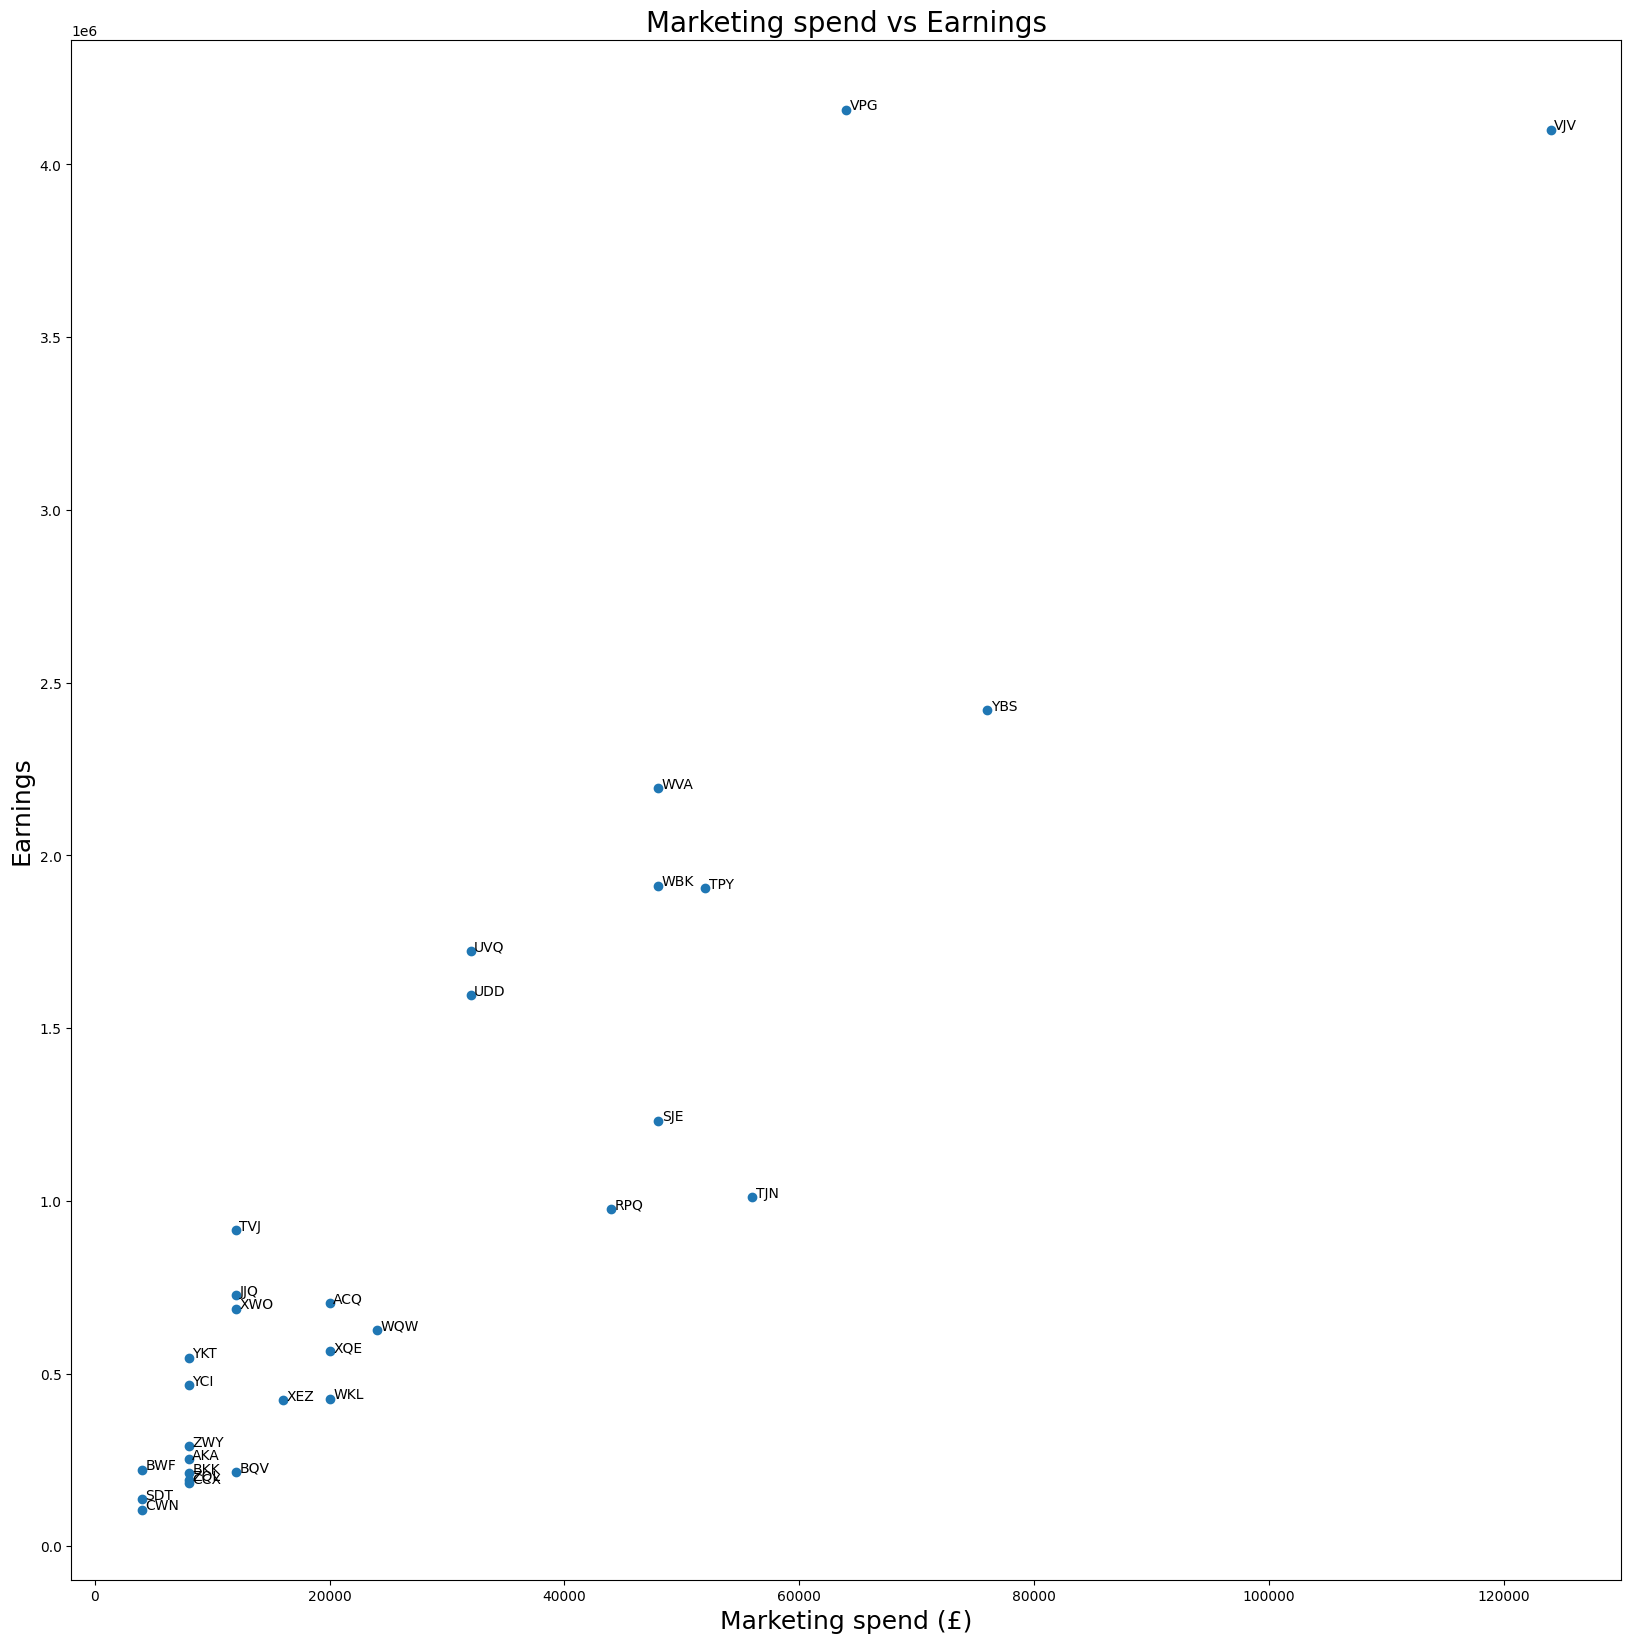

In [ ]:
plt.figure(figsize=(20, 20))
plt.scatter(summary_data['Marketing_overall'], summary_data['Earnings'])
plt.title('Marketing spend vs Earnings', fontsize=20)
plt.xlabel('Marketing spend (£)', fontsize=18)
plt.ylabel('Earnings', fontsize=18)
for i, name in enumerate(data.columns):
    plt.annotate(name, (summary_data['Marketing_overall'][i] + 300, summary_data['Earnings'][i]))
plt.show()


In [ ]:
summary_data

**Bar chart for Profit across cinemas**


*   An easy visualization to see the overall profits across cinemas, allowing us to evaluate the relative performance and appeal of different cinemas.




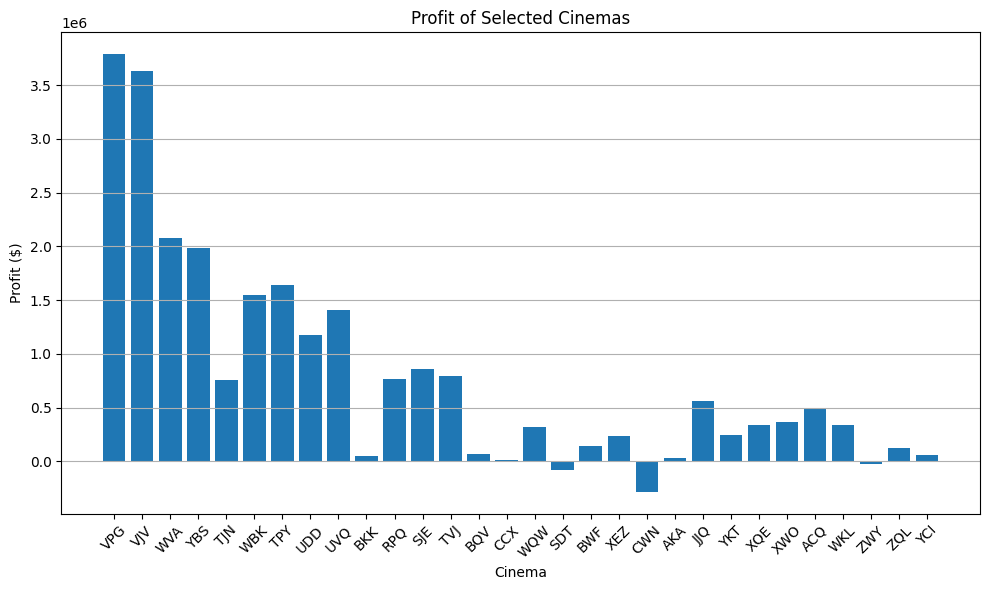

In [ ]:
selected_cinemas = ['VPG', 'VJV', 'WVA','YBS','TJN', 'WBK', 'TPY', 'UDD', 'UVQ', 'BKK', 'RPQ', 'SJE', 'TVJ', 'BQV','CCX', 'WQW', 'SDT', 'BWF', 'XEZ', 'CWN', 'AKA', 'JJQ', 'YKT', 'XQE', 'XWO', 'ACQ', 'WKL', 'ZWY', 'ZQL', 'YCI']
selected_data = summary_data.loc[selected_cinemas]

plt.figure(figsize=(10, 6))
plt.bar(selected_data.index, selected_data['Profit'])

plt.title('Profit of Selected Cinemas')
plt.xlabel('Cinema')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()
